In [63]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay,classification_report

pd.set_option('display.max_columns', None)

In [80]:
# Load dataset into a dataframe
df0 = pd.read_csv(r"C:\Users\akash\OneDrive\Documents\dataset\kaggle dataset\HR_analytics_jobPrediction.zip")

# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
print('Departments: ') 
print(df0['Department'].describe())
print('Departments unique names: ')
print(*list(df0['Department'].unique()), sep=', ')


# For categorical features
print('\nSalary: ') 
print(df0['salary'].describe())
print('Salary unique categories: ')
print(*list(df0['salary'].unique()), sep=', ')

Departments: 
count     14999
unique       10
top       sales
freq       4140
Name: Department, dtype: object
Departments unique names: 
sales, accounting, hr, technical, support, management, IT, product_mng, marketing, RandD

Salary: 
count     14999
unique        3
top         low
freq       7316
Name: salary, dtype: object
Salary unique categories: 
low, medium, high


In [8]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
df0.columns = ['satisfaction','evaluation','number_project','monthly_hours','tenure','work_accident',
              'left','promoted','department','salary']
df0.head()

,satisfaction,evaluation,number_project,monthly_hours,tenure,work_accident,left,promoted,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
df0[df0.duplicated()].sort_values(by=['satisfaction', 'evaluation','number_project', 'monthly_hours'])

,satisfaction,evaluation,number_project,monthly_hours,tenure,work_accident,left,promoted,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
13283,1.00,0.86,2,264,3,0,0,0,IT,medium
12916,1.00,0.86,4,245,4,0,0,0,sales,medium
13089,1.00,0.88,6,201,4,0,0,0,technical,low
13586,1.00,0.93,5,167,3,0,0,0,sales,medium


In [11]:
df0.isna().sum()

satisfaction      0
evaluation        0
number_project    0
monthly_hours     0
tenure            0
work_accident     0
left              0
promoted          0
department        0
salary            0
dtype: int64

In [12]:
df0[df0.duplicated()].sort_values(by=['satisfaction', 'evaluation','number_project', 'monthly_hours'])

,satisfaction,evaluation,number_project,monthly_hours,tenure,work_accident,left,promoted,department,salary
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
...,...,...,...,...,...,...,...,...,...,...
13283,1.00,0.86,2,264,3,0,0,0,IT,medium
12916,1.00,0.86,4,245,4,0,0,0,sales,medium
13089,1.00,0.88,6,201,4,0,0,0,technical,low
13586,1.00,0.93,5,167,3,0,0,0,sales,medium


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed

df1 = df0.drop_duplicates().reset_index(drop=True)

print('Shape of dataset: ', df0.shape)
print('Shape of dataset without duplicates: ', df1.shape)

# Display first few rows of new dataframe as needed
df1.head(10)

Shape of dataset:  (14999, 10)
Shape of dataset without duplicates:  (11991, 10)


,satisfaction,evaluation,number_project,monthly_hours,tenure,work_accident,left,promoted,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


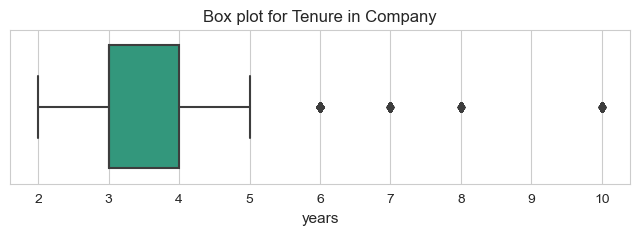

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
threshold = 1.5

plt.figure(figsize=(8,2))
sns.set_style("whitegrid") 

#whis is Proportion of the IQR past the low and high quartiles to extend the plot whiskers
bp = sns.boxplot(x = df1['tenure'], whis=threshold, color='#22A884FF')
bp.set(title='Box plot for Tenure in Company')
bp.set_xlabel('years', fontsize=11)

plt.show()

In [15]:
# Determine the number of rows containing outliers
q1 = df1.tenure.quantile(0.25)
q3 = df1.tenure.quantile(0.75)
iqr = q3 - q1

outliers = df1[(df1['tenure'] < q1 - threshold * iqr) | (df1['tenure'] > q3 + threshold * iqr)]

print('Q1: %.0f'% q1)
print('Q3: %.0f'% q3)
print("IQR: %.2f"% iqr)
print('Upper limit: %.1f'% (q3 + threshold * iqr))
print('Lower limit: %.1f'% (q1 - threshold * iqr))


outliers

Q1: 3
Q3: 4
IQR: 1.00
Upper limit: 5.5
Lower limit: 1.5


,satisfaction,evaluation,number_project,monthly_hours,tenure,work_accident,left,promoted,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium
...,...,...,...,...,...,...,...,...,...,...
11985,0.22,0.94,3,193,10,0,0,1,management,high
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high


In [16]:
# Get numbers of people who left vs. stayed
print(df1.left.value_counts(),'\n')

# Get percentages of people who left vs. stayed
print(df1.left.value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64 

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


C:\Users\akash\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


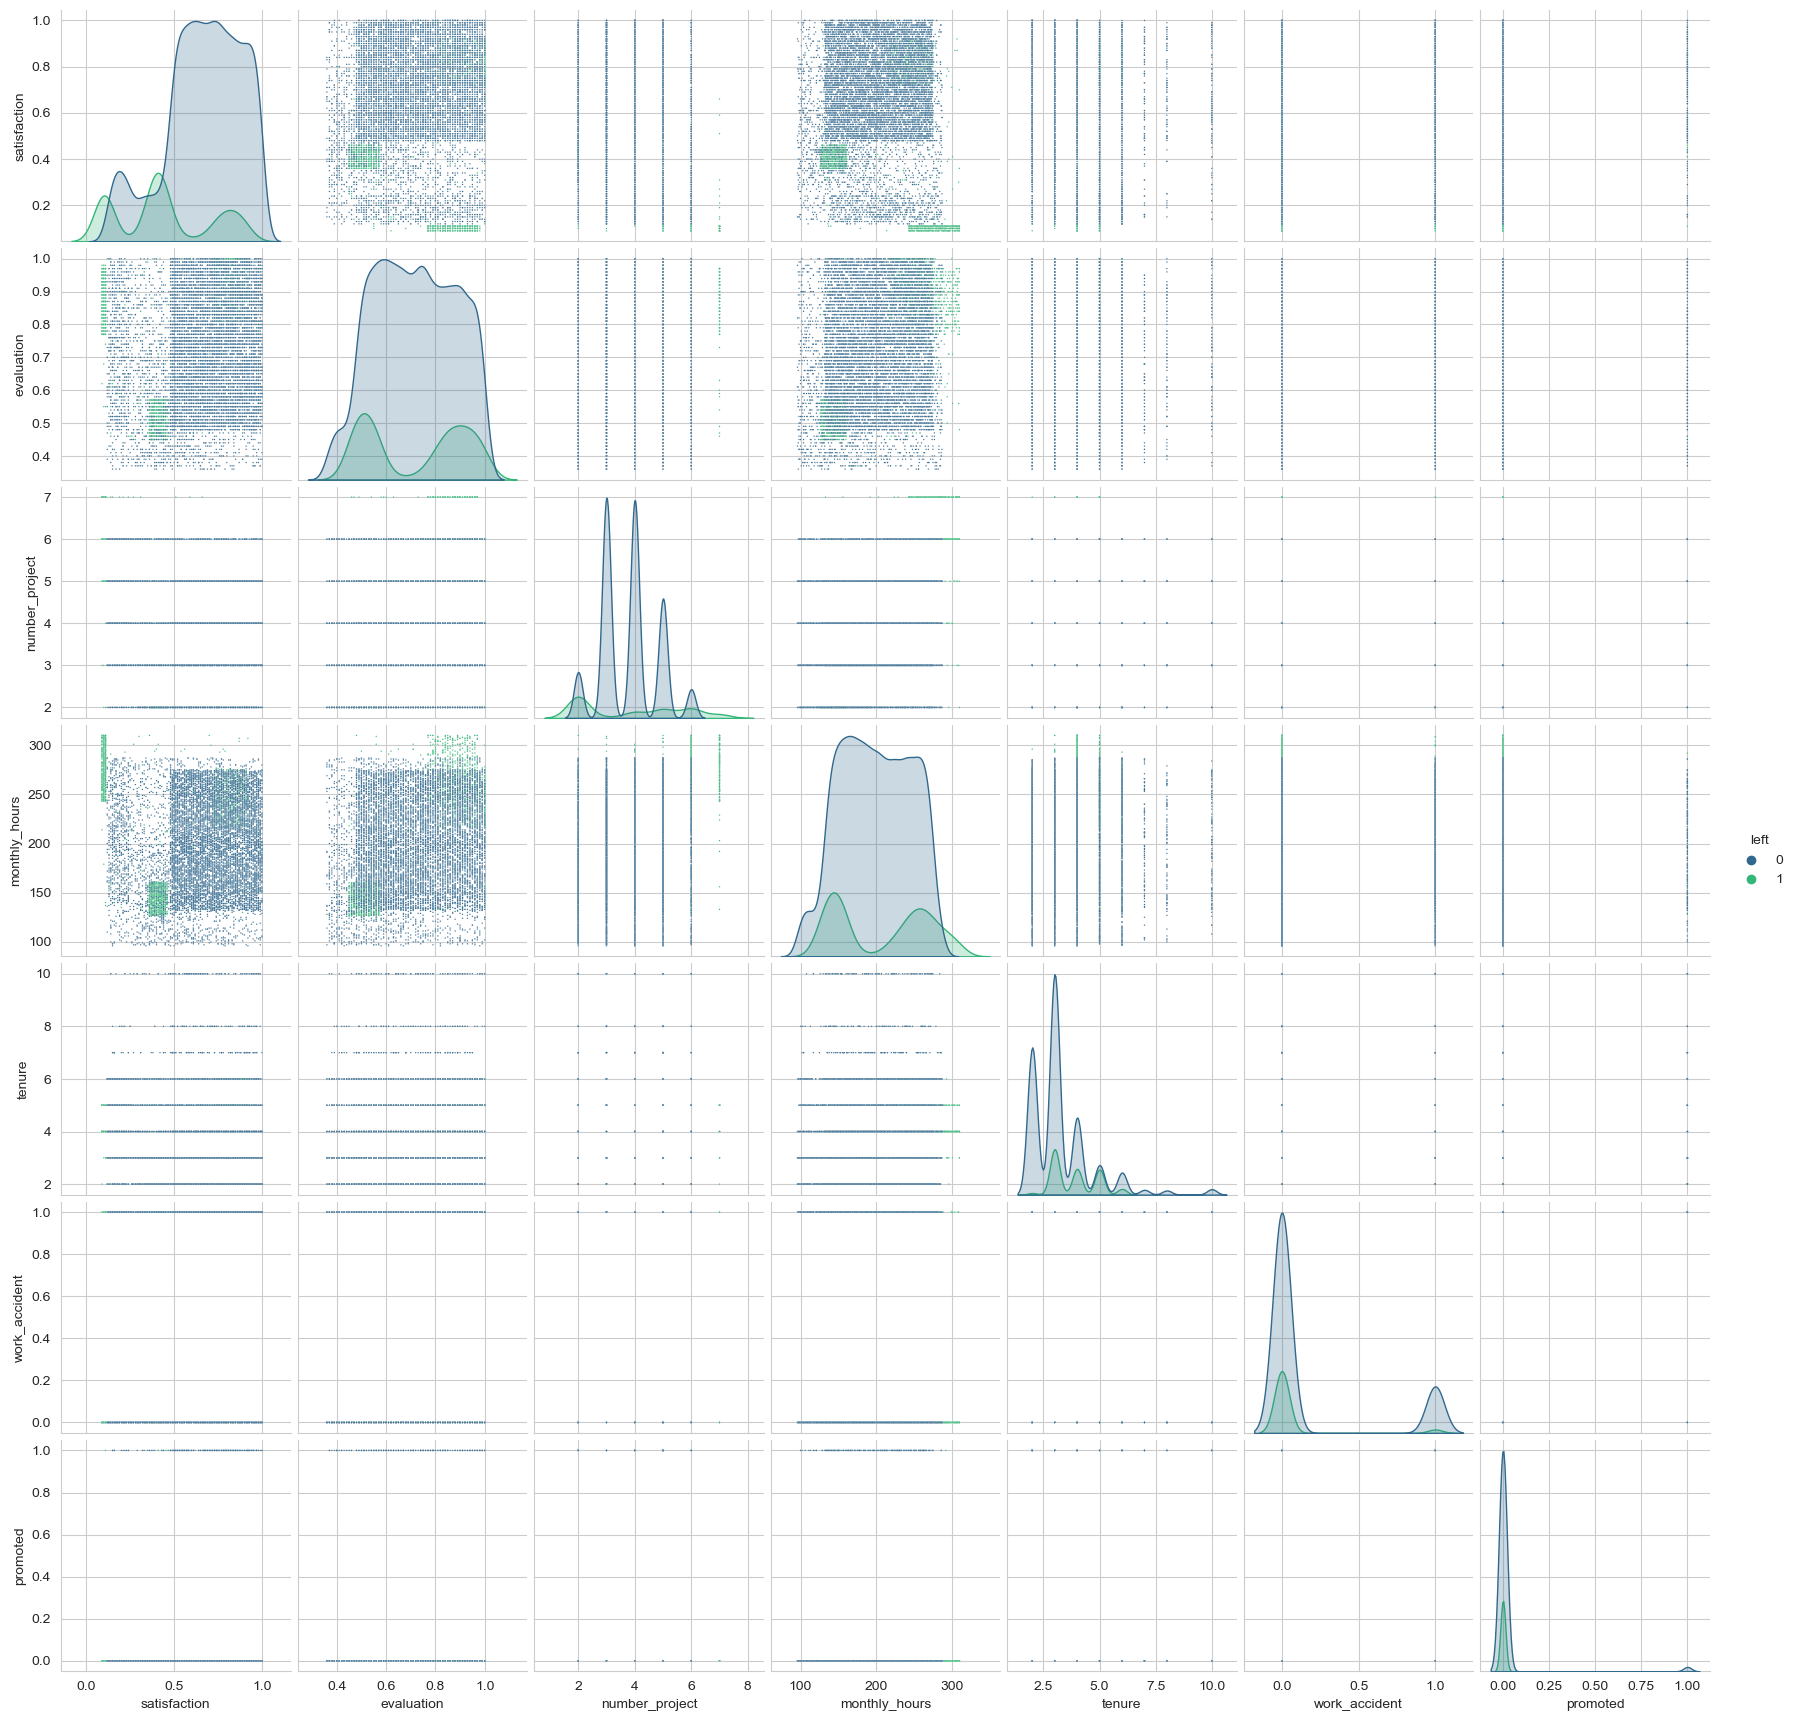

In [17]:
sns.pairplot(df1, hue='left',plot_kws={"s": 1},palette='viridis')

In [18]:
df1

,satisfaction,evaluation,number_project,monthly_hours,tenure,work_accident,left,promoted,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11986,0.90,0.55,3,259,10,1,0,1,management,high
11987,0.74,0.95,5,266,10,0,0,1,management,high
11988,0.85,0.54,3,185,10,0,0,1,management,high
11989,0.33,0.65,3,172,10,0,0,1,marketing,high


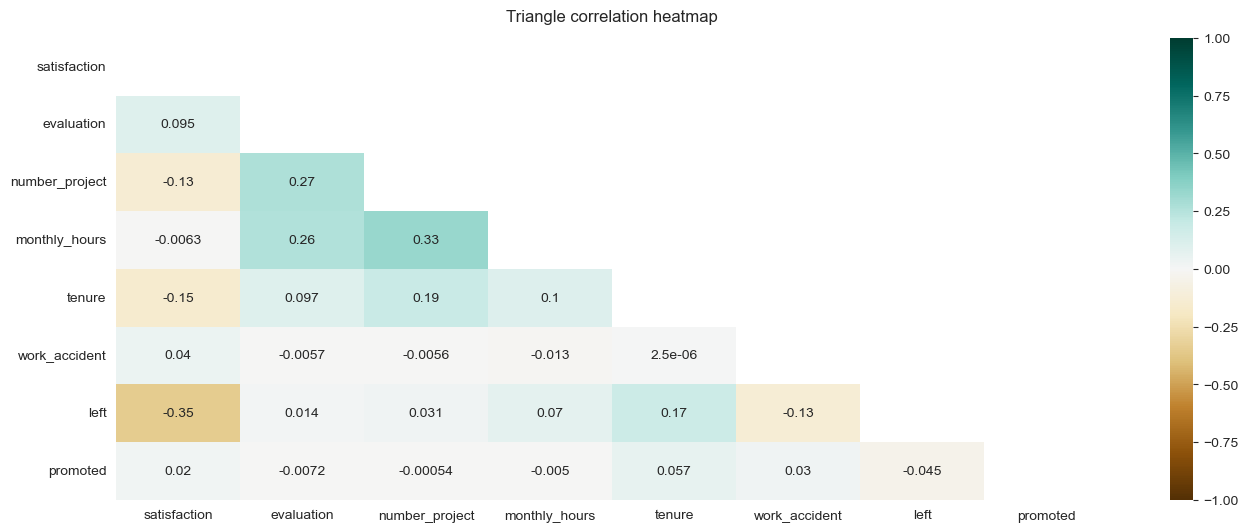

In [19]:
sns.set_style('white')

corr_matr = df1.drop(columns=['department','salary']).corr()

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr_matr, dtype='bool'))
heatmap = sns.heatmap(corr_matr, mask=mask,vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle correlation heatmap', fontdict={'fontsize':12}, pad=12);

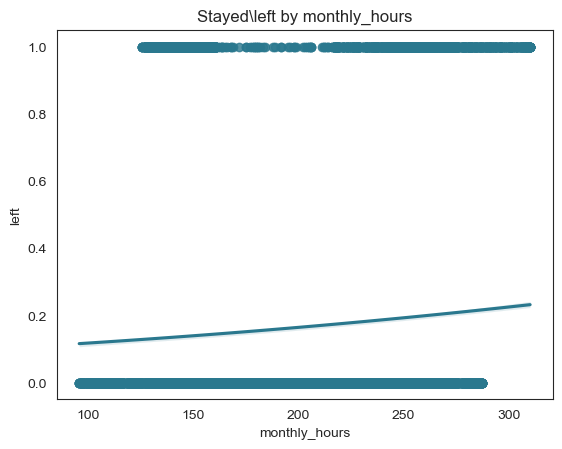

CPU times: total: 2.22 s
Wall time: 516 ms


In [21]:
%%time
sns.regplot(data=df1, x='monthly_hours', y='left', ci=90, n_boot=5, logistic=True, color='#2A788EFF')
plt.title('Stayed\left by monthly_hours')
plt.show()

In [22]:
max_hours_stayed = df1[df1['left']==0]['monthly_hours'].max()
print('Maximum monthly working hours for people who stayed in company: ',max_hours_stayed)

min_hours_left = df1[df1['left']==1]['monthly_hours'].min()
print('Minimum monthly working hours for people who left the company: ',min_hours_left)

Maximum monthly working hours for people who stayed in company:  287
Minimum monthly working hours for people who left the company:  126


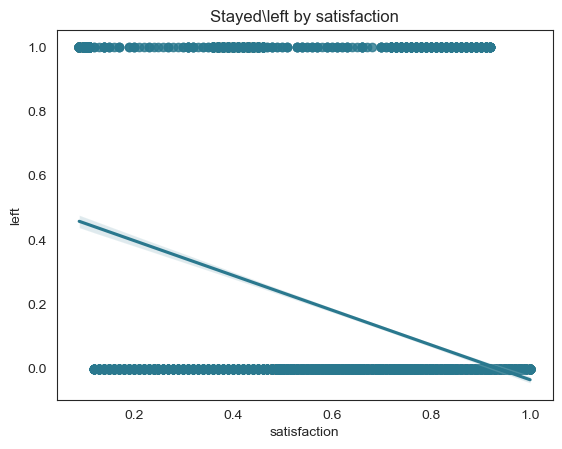

In [23]:
sns.regplot(data=df1, x='satisfaction', y='left',color='#2A788EFF')
plt.title('Stayed\left by satisfaction')
plt.show()

In [24]:
max_satisfaction = df1[df1['left']==1]['satisfaction'].max()
print('Maximum satisfaction for those, who left the company: ',max_satisfaction)

min_satisfaction = df1[df1['left']==0]['satisfaction'].min()
print('Minimum satisfaction for people who stayed in company: ',min_satisfaction)

Maximum satisfaction for those, who left the company:  0.92
Minimum satisfaction for people who stayed in company:  0.12


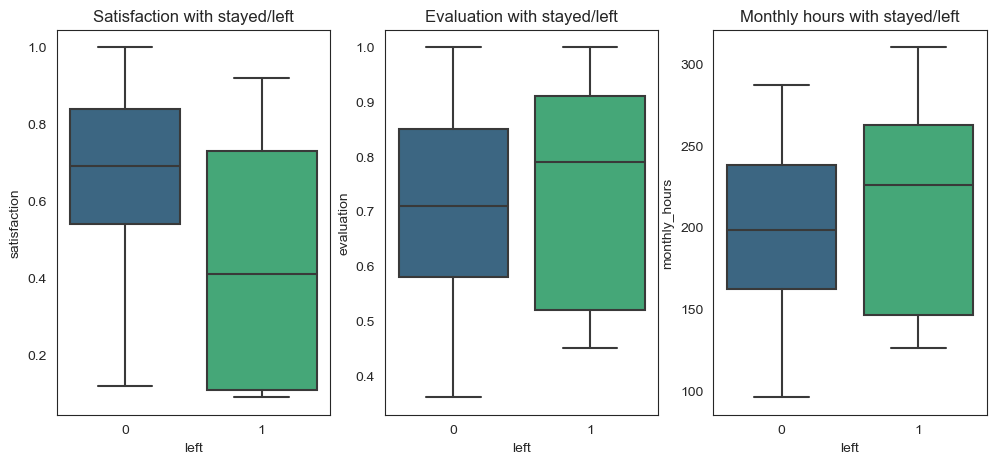

In [25]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(131)
sns.boxplot(data=df1, x='left', y='satisfaction',palette='viridis')
plt.title('Satisfaction with stayed/left')
ax2 = fig.add_subplot(132)
sns.boxplot(data=df1, x='left', y='evaluation',palette='viridis')
plt.title('Evaluation with stayed/left')
ax3 = fig.add_subplot(133)
sns.boxplot(data=df1, x='left', y='monthly_hours',palette='viridis')
plt.title('Monthly hours with stayed/left')
plt.show()

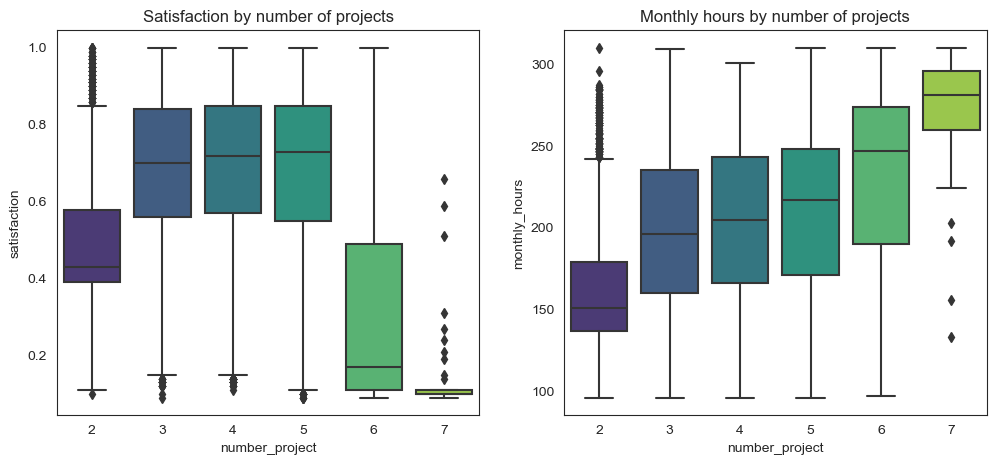

In [26]:
fig = plt.figure(figsize=(12, 5))
x1 = fig.add_subplot(121)
sns.boxplot(data=df1, x='number_project', y='satisfaction', palette='viridis')
plt.title('Satisfaction by number of projects')


ax2 = fig.add_subplot(122)
sns.boxplot(data=df1, x='number_project', y='monthly_hours', palette='viridis')
plt.title('Monthly hours by number of projects')


plt.show()

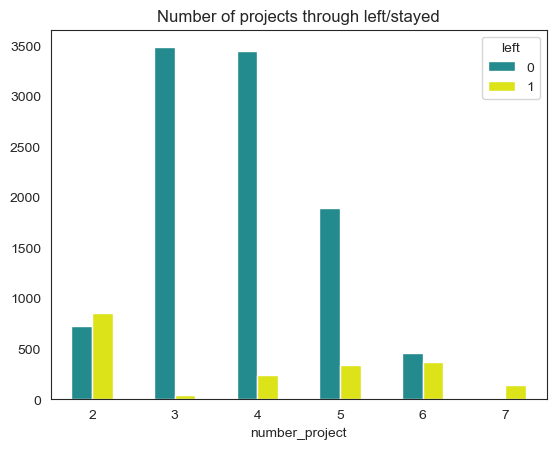

In [27]:
pd.crosstab(df1.number_project,df1.left).plot.bar(rot=0,color=['#238A8DFF','#DCE319FF'])
plt.title('Number of projects through left/stayed')
plt.show()

In [28]:
projects = df1.groupby(['number_project']).agg({'number_project':'count','left':'sum'}).rename(columns={"number_project": "employees"})
projects['percentage']=round(projects['left']/projects['employees']*100,2)
projects = projects.sort_values(by='percentage')
projects

,employees,left,percentage
number_project,,,
3,3520,38,1.08
4,3685,237,6.43
5,2233,343,15.36
6,826,371,44.92
2,1582,857,54.17
7,145,145,100.00


In [29]:
df1_promoted_left = df1[(df1['left']==1) & (df1['promoted']==1)]
print(f'Number of employees, promoted and left: {df1_promoted_left.shape[0]}')
df1_promoted_left

Number of employees, promoted and left: 8


,satisfaction,evaluation,number_project,monthly_hours,tenure,work_accident,left,promoted,department,salary
18,0.45,0.51,2,160,3,1,1,1,sales,low
82,0.79,0.59,4,139,3,0,1,1,management,low
171,0.41,0.46,2,160,3,0,1,1,sales,low
287,0.11,0.79,6,292,4,0,1,1,technical,low
583,0.41,0.56,2,154,3,0,1,1,support,medium
750,0.46,0.45,2,138,3,0,1,1,IT,low
998,0.87,1.00,4,258,5,1,1,1,sales,medium
1660,0.44,0.55,2,128,3,0,1,1,IT,medium


In [30]:
promotion = df1.groupby(['promoted']).agg({'promoted':'count','left':'sum'}).rename(columns={"promoted": "employees"})
promotion['percentage']=round(promotion['left']/promotion['employees']*100,2)
promotion = promotion.sort_values(by='percentage')
promotion

,employees,left,percentage
promoted,,,
1,203,8,3.94
0,11788,1983,16.82


Only 3.94 % (8 employees) of all promoted was left, while for unpromoted employees 1983 from 11788 = 16.82% left

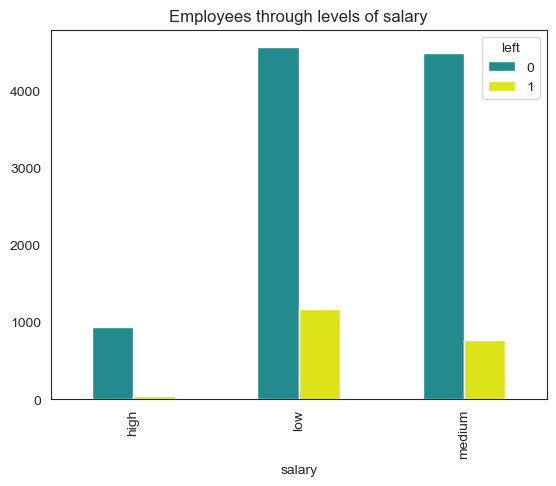

In [31]:
pd.crosstab(df1.salary,df1.left).plot(kind='bar',color=['#238A8DFF','#DCE319FF'])
plt.title('Employees through levels of salary')
plt.show()

In [32]:
salary = df1.groupby(['salary']).agg({'salary':'count','left':'sum'}).rename(columns={"salary": "employees"})
salary['percentage']=round(salary['left']/salary['employees']*100,2)
salary = salary.sort_values(by='percentage')
salary

,employees,left,percentage
salary,,,
high,990,48,4.85
medium,5261,769,14.62
low,5740,1174,20.45


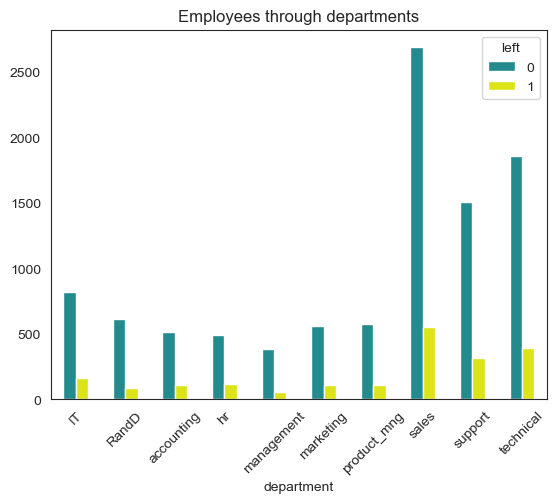

In [33]:
pd.crosstab(df1.department,df1.left).plot.bar(rot=45,color=['#238A8DFF','#DCE319FF'])
plt.title('Employees through departments')
plt.show()

In [34]:
departments = df1.groupby(['department']).agg({'department':'count','left':'sum'}).rename(columns={"department": "employees"})
departments['percentage']=round(departments['left']/departments['employees']*100,2)
departments = departments.sort_values(by='percentage')
departments

,employees,left,percentage
department,,,
management,436,52,11.93
RandD,694,85,12.25
product_mng,686,110,16.03
IT,976,158,16.19
marketing,673,112,16.64
sales,3239,550,16.98
support,1821,312,17.13
technical,2244,390,17.38
accounting,621,109,17.55


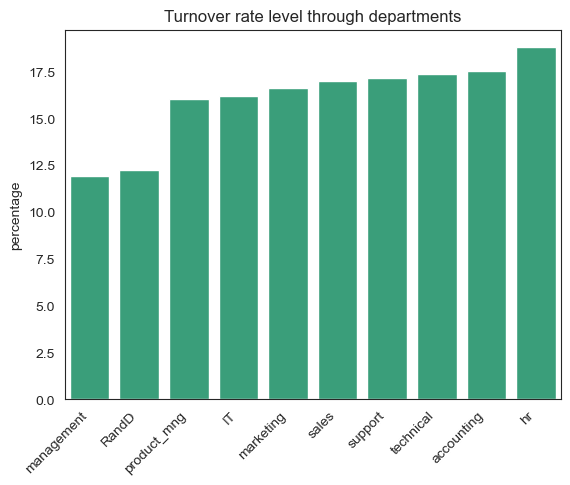

In [35]:
sns.set_color_codes(palette="colorblind")
sns.barplot(x=list(departments.index), y=departments["percentage"],
            label="Total", color="#29AF7FFF")
plt.xticks(rotation=45, ha='right')
plt.title('Turnover rate level through departments')
plt.show()

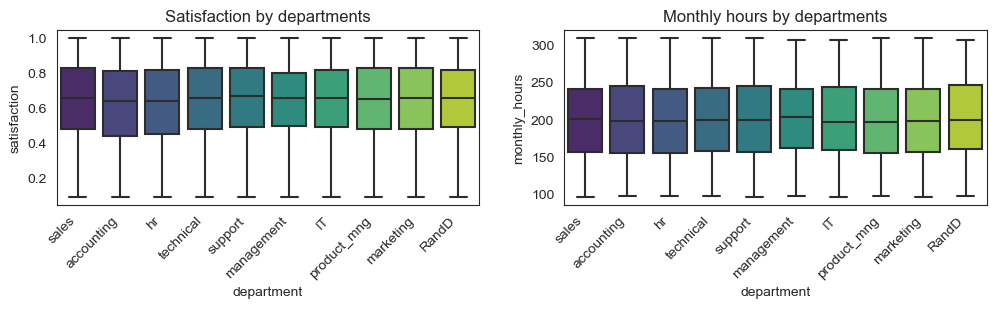

In [36]:
fig = plt.figure(figsize=(12, 5))
x1 = fig.add_subplot(221)
sns.boxplot(data=df1, x='department', y='satisfaction', palette='viridis')
plt.title('Satisfaction by departments')
plt.xticks(rotation=45, ha='right')

ax2 = fig.add_subplot(222)
sns.boxplot(data=df1, x='department', y='monthly_hours', palette='viridis')
plt.title('Monthly hours by departments')


plt.xticks(rotation=45, ha='right')
plt.show()

In [37]:
df_1 = df1.copy()
ordinal_salary = {'low': 0, 'medium':1, 'high':2}
df_1['salary'] = df_1['salary'].map(ordinal_salary)
df_1 = pd.get_dummies(df_1, ['department'])

In [38]:
tenure_mask = (q1 - threshold * iqr <= df_1['tenure']) & (df_1['tenure'] <= q3 + threshold * iqr)
df_1 = df_1[tenure_mask]

In [39]:
print('Number of examples: ',df1.shape[0])
print('Number of examples without outliers in tenure: ',df_1.shape[0])

Number of examples:  11991
Number of examples without outliers in tenure:  11167


In [40]:
df_1.head()

,satisfaction,evaluation,number_project,monthly_hours,tenure,work_accident,left,promoted,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [41]:
y = df_1.left
X = df_1.drop(columns=['left'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=42)

In [42]:
%%time

columns = ['satisfaction', 'evaluation', 'number_project', 'monthly_hours',
       'tenure', 'work_accident', 'promoted', 'salary', 'department_IT',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical']


lr_model = LogisticRegression(random_state=42, max_iter=500).fit(X_train[columns], y_train)

CPU times: total: 156 ms
Wall time: 219 ms


In [45]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [60]:
models = [LogisticRegression(),SVC(),GaussianNB()]

In [78]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [81]:
def check_models():
    for model in models:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        print(f'Accuracy of {model} :{round(acc,2)*100}%')
        
        print(classification_report(y_test, pred))
        
        print("---------------------------------------------------------------------")

check_models()

Accuracy of LogisticRegression() :82.0%
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1857
           1       0.44      0.26      0.33       377

    accuracy                           0.82      2234
   macro avg       0.65      0.60      0.61      2234
weighted avg       0.79      0.82      0.80      2234

---------------------------------------------------------------------
Accuracy of SVC() :83.0%
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1857
           1       0.00      0.00      0.00       377

    accuracy                           0.83      2234
   macro avg       0.42      0.50      0.45      2234
weighted avg       0.69      0.83      0.75      2234

---------------------------------------------------------------------
Accuracy of GaussianNB() :84.0%
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1857


### Accuracy of Naive Bayes model is 84.0%